Submitted by Sneha Ganesh

# Convolutional Neural Network

1. Three models:
  *   Scratch
  *   Pre-trained
  *   Fine-tuning
2. Dataset: Training/test split
3. Dataset size 
4. Train models with/without data augmentation
5. Use drop outs and earliy stopping   
6. Loss plot for all model trainings
7. Confusion matrix for training and test
8. Error analysis in colab
Submission: In a single colab - all models. 
And describe your deployment strategy in the same colab.

# From the Scratch

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [2]:
tf.__version__

'2.3.0'

## Part 1 - Data Preprocessing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Check the number of images we have for each partition

In [4]:
import os

path, dirs, files = next(os.walk("/content/drive/My Drive/PotholeDataset/training_set/normal"))
file_count_train_normal = len(files)
print("Training File Normal Road Images:",file_count_train_normal)

path, dirs, files = next(os.walk("/content/drive/My Drive/PotholeDataset/training_set/potholes"))
file_count_train_pothole = len(files)
print("Training File Pothole Road Images:",file_count_train_pothole)

path, dirs, files = next(os.walk("/content/drive/My Drive/PotholeDataset/test_set/normal"))
file_count_test_normal = len(files)
print("Test File Normal Road Images:",file_count_test_normal)

path, dirs, files = next(os.walk("/content/drive/My Drive/PotholeDataset/test_set/pothole"))
file_count_test_pothole = len(files)
print("Test File Pothole Road Images:",file_count_test_pothole)

Training File Normal Road Images: 619
Training File Pothole Road Images: 609
Test File Normal Road Images: 108
Test File Pothole Road Images: 85


1. The first thing to do is to apply some transformations on all the images of the training set.

2. The images of the training set only we want apply these same transformations on the test.

3. The reason why we want to apply some transformations on the images of the training set is for only one purpose.
It is to avoid overfilling.

4. If we don't apply these transformations well when training our CNN on the training set, we will get a huge difference between the accuracy on the training set and the one on the test set, and it leads to overfitting. 

So to avoid overfitting we apply transformations. 

### Preprocessing the Training set

1. Apply some simple geometrical 
transformations or some zooms or some rotations on the images.
Transactions to shift some of the pixels, rotation, some horix=zontal flips, zoom in zoom out
2.  Apply some series transformation so as to modify the images and get them augmented. 
3.  Perform image augmentation, which is the technical term for transformations, which basically transforms the training images so the CNN model doesn't overlearn, not over train on existing images.
4.  By applying these transformations, we will get new images.

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   # Feature Scaling This will apply feature scaling to each and every single one of your pixels by dividing their value by 255.
                                   # Because remember that each pixel takes a value between zero and 255.
                                   # So by dividing all of them by 255, we indeed get all the pixel values between zero and one, which is just like a normalization.
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True) # Rest are just transformations that will perform image augmentation on the images of the training set.

# A trained data gen is an instance of that image data generator class in which represents, 
# of course, the tool that will apply all the transformations on the images of the training set.
# The tool that will apply all the transformations on the images of the training set.
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/PotholeDataset/training_set',
                                                 target_size = (64, 64), # Kept it 150 previously, but took too long
                                                 batch_size = 32, # Default value
                                                 class_mode = 'binary')

Found 1227 images belonging to 2 classes.


### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255) #Rescale the pixels
# Not going to apply the same transformation's here, such as a sheering the zoom 
# in the horizontal flip, because, of course, we don't want to touch the test images because they're are like new images.
# We have to feature scale them because once again, the future predict method of CNN will have
# to be applied to the same scaling as the one that was applied on the training set.

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/PotholeDataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 193 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [7]:
cnn = tf.keras.models.Sequential() 
# Create a CNN variable which will exactly represent the Convolutional Neural Network,
# it is created as an instance of that sequential class which allows to create an artificial neural network as a sequence of layers.

Well, first, we need to call tensor flow, from which we're going to call the Keras Library, from which we're going to get access to the models module, and from which we're going to call that sequential class.

### Step 1 - Convolution

1. First take the CNN object or convolutional neural network from which call, the ADD method to add the very first convolutional layer.
2. Now we need a convolutional layer,  this convolutional layer will be an object of a certain class, which is the conv2D.
3. Input three important parameters, which are the filters. Which basically is the number of feature detectors to apply to the images, to detect features.
And these are indeed also called filters or Kernels.
4. This filter parameter will tell us how many feature detectors we want, how many filters we want. And the kernel size is exactly, the size of that feature detector, meaning the number of rows, which is also the number of columns. Because this is usually a squared array. Here size of feature detector will be 3X3.
5. Acitivation Function Parameter: On a general rule, as long as we haven't reached the output layer, we rather want to get a rectifier activation function. And therefore, for this one activation, we're gonna choose once again the RELU parameters name, which corresponds to the rectify activation function.
6. Input Shape: When you add your very first layer, whether it is a convolutional layer or a dense layer. Well, you have to specify the input shape of your inputs. Since we were working with colored images, therefore in three dimensions, corresponding to the RGB code of colors.
And since we actually resized in part one, are images down to 64 by 64.
Well, the input shape of our images will be 64, 64 and three. If images are black and white then 1 instead of 3.


In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
# Default architechture for filter i.e. 32.

### Step 2 - Pooling

1. Add the pooling layers to our convolutional layer, as the next step in the sequence of layers.
2. So we have the feature map, which is the result of the previous convolution, and apply, Max pooling to obtain this pooled feature map.
3. Pool size parameter, is exactly the size of that frame, which is once again a square. The little frame will get the maximum pixel of the four cells inside, i.e. the four pixels inside. 
4. Strides : by which number of pixels is this frame shifted to the right.

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.25)) # Dropout

### Adding a second convolutional layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.25))

### Adding third convolutional layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.25))

### Step 3 - Flattening

1. Flattening : Consists of flattening the result of all these convolutions and pullings into a one dimensional vector, which will become the input of a future fully connected new network.
2. Call the ADD method once again, because the way we're gonna create that flattening layer is once again by creating an instance of a certain class and that certain class is the flattened class.


In [12]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

 We have the unit, which is number of hidden neurons. You want to have into this new fully connected layer. Computer vision is way more complex than data mining.Classic data set as before. Choose a larger number of hidden neurons. Here I chose one hundred twenty eight hidden neurons, better accuracy in the end with a larger number of neurons.

As long as final output layer haven't reached, I use a rectifier activation function.

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

1. The number of units, the number of neurons in the final output layer is
definitely not 128, it is 1. Binary classification.
2. Therefore, we only need one neuron to encode that binary class zero or one i.e. pothole or normal road. And therefore, we only need one neuron.
3. And for the activation function, for the output layer, it is not recommended to have
a rectifier activation function, but rather a sigmoid activation function.
And that's because, its a binary classification.
4. If it were a multiclass classification we would use a softmax activation function.

In [14]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [15]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Early Stopping

In [16]:
# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9

### Training the CNN on the Training set and evaluating it on the Test set

In [18]:
# fit model
cnn_mod=cnn.fit(x = training_set, validation_data = test_set, epochs = 10, callbacks=[es])
# Fit method, will train the CNN on the training set.
# First input is always the same. It's going to be, the data set on which you're going to train your model here to CNN.
# Not only training the CNN on the train set, but also evaluating it at the same time on the test set.
# And that second parameter corresponds exactly to this, to specify here the validation data.

Epoch 1/10
16/39 [===========>..................] - ETA: 20s - loss: 0.6951 - accuracy: 0.5377

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


39/39 [==============================] - 43s 1s/step - loss: 0.6279 - accuracy: 0.6259 - val_loss: 0.5372 - val_accuracy: 0.7720
Epoch 2/10
39/39 [==============================] - 43s 1s/step - loss: 0.4408 - accuracy: 0.8158 - val_loss: 0.4663 - val_accuracy: 0.7668
Epoch 3/10
39/39 [==============================] - 46s 1s/step - loss: 0.3732 - accuracy: 0.8378 - val_loss: 0.4597 - val_accuracy: 0.7876
Epoch 4/10
39/39 [==============================] - 42s 1s/step - loss: 0.3180 - accuracy: 0.8582 - val_loss: 0.4320 - val_accuracy: 0.8187
Epoch 5/10
39/39 [==============================] - 42s 1s/step - loss: 0.2651 - accuracy: 0.8859 - val_loss: 0.3429 - val_accuracy: 0.8394
Epoch 6/10
39/39 [==============================] - 42s 1s/step - loss: 0.2685 - accuracy: 0.8826 - val_loss: 0.3639 - val_accuracy: 0.8342
Epoch 00006: early stopping


In [19]:
# evaluate the model
_, train_acc = cnn.evaluate(training_set, verbose=0)
_, test_acc = cnn.evaluate(test_set, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Train: 0.883, Test: 0.834


### Plot

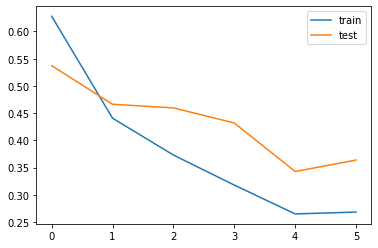

In [20]:
from matplotlib import pyplot
pyplot.plot(cnn_mod.history['loss'], label='train')
pyplot.plot(cnn_mod.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [21]:
batch_size = 32
num_of_test_samples=file_count_test_normal+file_count_test_pothole

### Confusion Matrix

In [22]:
# #Confution Matrix and Classification Report
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
# Y_pred = cnn.predict_generator(test_set,steps = np.ceil(test_set.samples / test_set.batch_size), verbose=1, workers=0)# num_of_test_samples // batch_size+1)
predictions = cnn.predict_generator(test_set, steps = np.ceil(test_set.samples / test_set.batch_size), verbose=1, workers=0)
y_pred = np.where(predictions>0.5, 1, 0)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = list(test_set.class_indices.keys())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Instructions for updating:
Please use Model.predict, which supports generators.
7/7 [==============================] - 4s 558ms/step
Confusion Matrix
[[48 60]
 [32 53]]
Classification Report
              precision    recall  f1-score   support

      normal       0.60      0.44      0.51       108
     pothole       0.47      0.62      0.54        85

    accuracy                           0.52       193
   macro avg       0.53      0.53      0.52       193
weighted avg       0.54      0.52      0.52       193




## Part 4 - Making a single prediction

Populating the interactive namespace from numpy and matplotlib


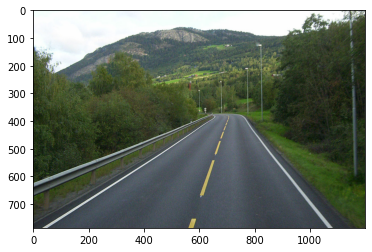

In [23]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/My Drive/PotholeDataset/single_prediction/pot_or_not1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [24]:
# Below is a function which takes the image path as input and predict the image and return the value. 
# 0 - Normal 
# 1 - Pothole
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np
from keras.preprocessing import image
def predictImg(imgpath):
    predict_image = image.load_img(imgpath, target_size = (64,64))
    predict_image = image.img_to_array(predict_image)
    predict_image = np.expand_dims(predict_image, axis=0)
    result = cnn.predict(predict_image)
    return result.max()


predictImg("/content/drive/My Drive/PotholeDataset/single_prediction/pot_or_not1.jpg")

0.0

Populating the interactive namespace from numpy and matplotlib


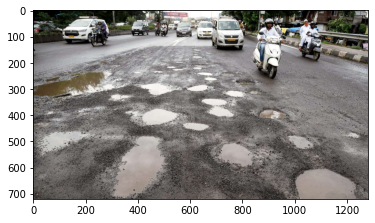

In [25]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/My Drive/PotholeDataset/single_prediction/pot_or_not2.jpg')
imgplot = plt.imshow(img)
plt.show()

In [26]:
predictImg('/content/drive/My Drive/PotholeDataset/single_prediction/pot_or_not2.jpg')

1.0

In [27]:
# Save a model and load a model
import h5py
# h5py.run_tests()
cnn.save("nompot.model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nompot.model/assets


In [28]:
new_model=tf.keras.models.load_model('nompot.model')

# Pre-Trained Model

### Step 1: Image Augmentation

In [4]:
import os 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [5]:
base_dir = '/content/drive/My Drive/PotholeDataset'
train_dir = os.path.join(base_dir, 'training_set')
validation_dir = os.path.join(base_dir, 'test_set')

In [6]:
# Directory with our training cat pictures
train_normal_dir = os.path.join(train_dir, 'normal') #cats-->normal #dogs-->potholes

# Directory with our training dog pictures
train_potholes_dir = os.path.join(train_dir, 'potholes')

# Directory with our validation cat pictures
validation_normal_dir = os.path.join(validation_dir, 'normal')

# Directory with our validation dog pictures
validation_potholes_dir = os.path.join(validation_dir, 'potholes')

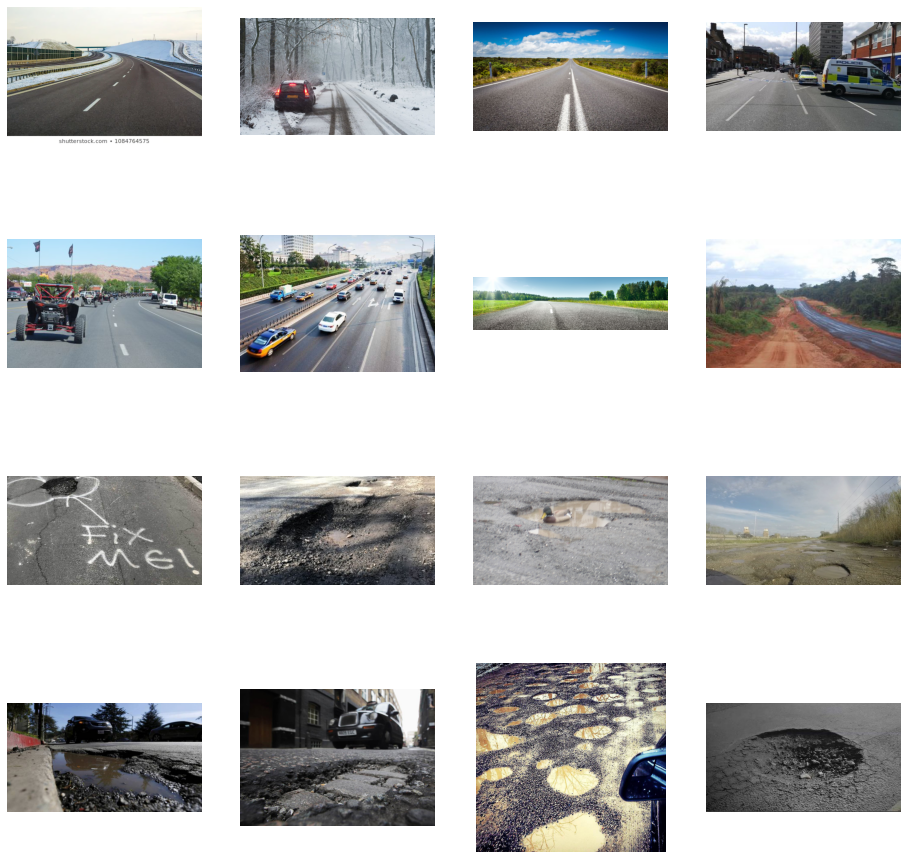

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_normal_fnames = os.listdir( train_normal_dir )
train_potholes_fnames = os.listdir( train_potholes_dir )


next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_fnames[ pic_index-8:pic_index] 
               ]

next_potholes_pix = [os.path.join(train_potholes_dir, fname) 
                for fname in train_potholes_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_normal_pix+next_potholes_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Very Deep Convolutional Networks for Large-Scale Image Recognition(VGG-16)

In [8]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [9]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 1227 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


Loading the Base Model

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [11]:
for layer in base_model.layers:
    layer.trainable = False

In [12]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
vgghist = model.fit( x= train_generator, validation_data = validation_generator, epochs = 10, callbacks=[es])
# action = model.predict(image)
# cnn_mod=cnn.fit(x = training_set, validation_data = test_set, epochs = 10, callbacks=[es])


Epoch 1/10
 9/62 [===>..........................] - ETA: 8:40 - loss: 1.1017 - acc: 0.5889

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


62/62 [==============================] - 778s 13s/step - loss: 0.4124 - acc: 0.8289 - val_loss: 0.1719 - val_acc: 0.9430
Epoch 2/10
62/62 [==============================] - 781s 13s/step - loss: 0.1982 - acc: 0.9234 - val_loss: 0.1078 - val_acc: 0.9637
Epoch 3/10
23/62 [==========>...................] - ETA: 6:37 - loss: 0.1702 - acc: 0.9262

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(train_generator, verbose=0)
_, test_acc = model.evaluate(validation_generator, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

### Plot

In [ ]:
from matplotlib import pyplot
pyplot.plot(vgghist.history['loss'], label='train')
pyplot.plot(vgghist.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
#Plotting the training and validation loss
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column
#Training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')
#Training accuracy and validation accuracy
ax[1].plot(model.history.history['acc'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_acc'],color='r',label='Validation Accuracy')

In [42]:
batch_size = 32
num_of_test_samples=file_count_test_normal+file_count_test_pothole

### Confusion Matrix

In [45]:
# #Confution Matrix and Classification Report
import numpy
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
# Y_pred = vgghist.predict_generator(validation_generator,steps = np.ceil(validation_generator.samples / validation_generator.batch_size), verbose=1, workers=0)# num_of_test_samples // batch_size+1)
predictions = model.predict_generator(validation_generator, steps = np.ceil(validation_generator.samples / validation_generator.batch_size), verbose=1, workers=0)
y_pred = np.where(predictions>0.5, 1, 0)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

7/7 [==============================] - 67s 10s/step
Confusion Matrix


ValueError: ignored

In [44]:
tensorboard --logdir=logs

SyntaxError: ignored

## Fine Tuning

## Step-1: Freeze and Pre-train

Image Augmentation:

In [ ]:
base_dir = '/content/drive/My Drive/PotholeDataset'
train_dir = os.path.join(base_dir, 'training_set')
validation_dir = os.path.join(base_dir, 'test_set')

In [ ]:
# Directory with our training cat pictures
train_normal_dir = os.path.join(train_dir, 'normal') #cats-->normal #dogs-->potholes

# Directory with our training dog pictures
train_potholes_dir = os.path.join(train_dir, 'potholes')

# Directory with our validation cat pictures
validation_normal_dir = os.path.join(validation_dir, 'normal')

# Directory with our validation dog pictures
validation_potholes_dir = os.path.join(validation_dir, 'potholes')

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_normal_fnames = os.listdir( train_normal_dir )
train_potholes_fnames = os.listdir( train_potholes_dir )


next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_fnames[ pic_index-8:pic_index] 
               ]

next_potholes_pix = [os.path.join(train_potholes_dir, fname) 
                for fname in train_potholes_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_normal_pix+next_potholes_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
batch_size=10
 
train_datagen = image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
 
test_datagen = image.ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
        args["train_dir"],
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        args["val_dir"],
        target_size=(img_size,img_size),
        batch_size=batch_size,
        class_mode='categorical')

Bottleneck Model:

1. The top layer of the pre-trained model was removed and replaced with a new fully connected layer with a Sigmoid classifier.
2. GlobalAveragePooling2D progressively reduces the spatial size and the amount of parameters and computation in the network as well as control overfitting. 
3. The Dense layer is the densely-connected Neural Network layer of size 1024 with the Rectified Linear Unit (relu) as the activator.

In [ ]:
# Add on new fully connected layers with dropout for intializing the final fully connected layer

def build_bottleneck_model(base_model, dropout, fc_layers, num_classes):
    # Freeze All Layers Except Bottleneck Layers for Fine-Tuning
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    
    for fc in fc_layers:
        x = Dense(fc, activation='relu')(x) # New FC layer, random init
        x = Dropout(dropout)(x)

    predictions = Dense(num_classes-1, activation='sigmoid')(x)
    
    bottleneck_model = Model(inputs=base_model.input, outputs=predictions)

    return bottleneck_model

### FineTuning Model: 

1. In the Fine Tuning phase some or none of the lower convolutional layers of the model were prevented from training depending upon the results from the Transfer Learning phase.
2. Set up fine tuning on pre-trained ImageNet vgg16 model
3. In finetuning model, we would input the model weights learned from bottleneck_model.
4. Compile the revised model using SGD optimizer with a learing rate of 0.0001 and a momentum of 0.9 ,the learning rate of optimizer low. 

In [ ]:
from keras.models import Model
base_model = Model.load_weights(file_path_of_the_weights_file)

# Freeze Half of all Layers Except final Eight layers of VGG_NET Fine-Tuning
for layer in base_model.layers[:8]:
    layer.trainable = False
for layer in base_model.layers[:8]:
    layer.trainable = False

In [ ]:
from keras.optimizers import SGD
optimizer=SGD(lr=0.0001, momentum=0.9)

In [ ]:
# Add on new fully connected layers with dropout for fine tuning

def build_finetuning_model(base_model, dropout, fc_layers, num_classes):

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    
    for fc in fc_layers:
        x = Dense(fc, activation='relu')(x) # New FC layer, random init
        x = Dropout(dropout)(x)

    predictions = Dense(num_classes-1, activation='sigmoid')(x)
    
    finetuning_model = Model(inputs=base_model.input, outputs=predictions)

    return finetuning_model

In [ ]:
bottleneck_model = build_bottleneck_model(base_model, DROPOUT_RATE, FC_LAYERS, NB_CLASSES)
adam = Adam(lr=0.001)
bottleneck_model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
    
    
def lr_decay(epoch):
    if epoch%3 == 0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr/2)
        print("LR changed to {}".format(lr/2))
    return K.get_value(model.optimizer.lr)

learning_rate_schedule = LearningRateScheduler(lr_decay)

early_stopping = EarlyStopping(patience=2)

filepath= "../working/" + "weightfile.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint,early_stopping]


history = bottleneck_model.fit_generator(train_generator, epochs=NB_EPOCHS_BOTTLENECK, workers=8, steps_per_epoch= TRAINING_SAMPLE // BATCH_SIZE, 
validation_data=validation_generator, validation_steps= VALIDATION_SAMPLE // BATCH_SIZE, class_weight=class_weights, shuffle=True, callbacks=callbacks_list)

# **Deploying a CNN model on the web with Flask**

1. First train the model using TensorFlow and Keras’s ImageDataGenerator. For this, I have downloaded 727 images of Normal Road and 694 images of Pothole Roads respectively. 
2. To train a model using ImageDataGenerator first install keras and tensorflow.
3. After the model has been trained, execute the command which saves and creates a model folder of the trained model.
4. Creating Flask Application
Then, install Flask. Flask is a micro-framework in Python which is extensively used to deploy ML models on the web, install flask using pip install flask command.
5. Coming to the webpage, create a HTML page as the home page, have created a basic webpage with a button to upload an image and a button to predict what the image is, i.e. whether the image is an Normal Road image or a Pothole road image. The code sends the image as a post request and stores it in the folder “uploaded/image/” where a prediction is made from here.
6. The code is divided into 2 files, namely a .js (jason) file an a .html (HTML) file.
7. After the file is done, I will need ImageDataGenerator to make a prediction of an image once it has been trained. First I will load the model using the following code:

  `model = tf.keras.models.load_model('nompot.model') `

8. Then, I will need to import ImageDataGenerator. Now, coming to the flask the flask code, I will create a flask python codeand place it in the root directory.
9. Finally I will need to render a html page for the final prediction.
10. Output: Finally, all I need to do is run the file code.py and go to http://127.0.0.1:5000/ and see the output.